In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings

from mpl_toolkits.mplot3d import Axes3D
from random import random

# from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns

sns.set()
warnings.filterwarnings("ignore")
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
iris = pd.read_csv("../../../resources/data/IRIS.csv")  
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


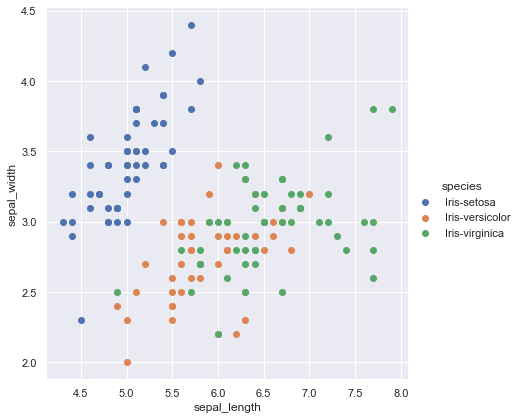

In [3]:
sns.FacetGrid(iris,hue='species',height=6).map(plt.scatter,'sepal_length','sepal_width').add_legend()

In [4]:
std = iris.std()['sepal_length']
mean = iris.mean()['sepal_length']
print(mean,std)

5.843333333333335 0.8280661279778629


D:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

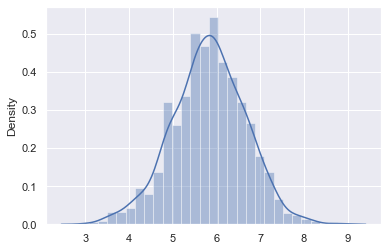

In [5]:
value = np.random.normal(loc=mean,scale=std,size=1000)
sns.distplot(value)


In [6]:
standar_deviations = iris.groupby("species").std()
means = iris.groupby("species").mean()
means['sepal_length']
means

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [27]:
standar_deviations

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [45]:
standar_deviations['sepal_length']

0.3524896872134513

In [7]:
iris.columns[:-1]
means['sepal_length']['Iris-setosa'] #['iris-setosa']
a = means['sepal_length']
a['Iris-setosa']

5.005999999999999

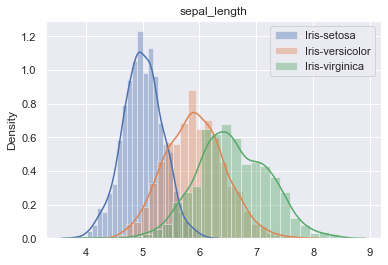

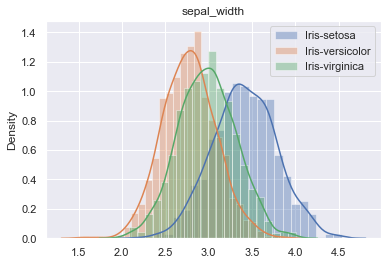

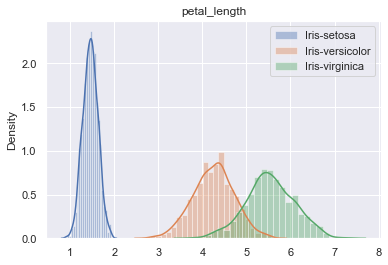

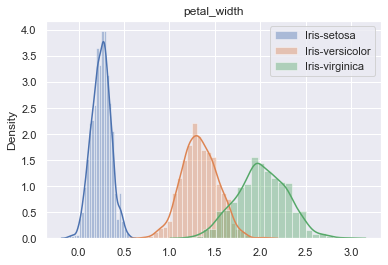

In [24]:
for i in iris.columns[:-1]:
    for j in means.index:
        value = np.random.normal(loc=means[i][j],scale=standar_deviations[i][j],size=1000)
        sns.distplot(value, label = j).set(title=i)
    plt.legend()
    plt.show()    
        
   

In [29]:
import scipy.stats
scipy.stats.norm.pdf(6,loc=5.006, scale=0.352490)

0.021232312052168526

In [30]:
scipy.stats.norm.pdf(6,loc=5.936, scale=0.516171)

0.7669696025283874

In [32]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
probability = iris.groupby('species')['species'].count()/len(iris)

In [74]:
density_gaus = scipy.stats.norm.pdf
density_gaus(5.1, loc=5.006, scale=0.352490)
standar_deviations
means

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


<IPython.core.display.Javascript object>

In [91]:
def calculate(arg):
    predicticted_label = None
    highest_likehood = 0
    for label in standar_deviations.index:
        likehood = probability[label]
        for feature in standar_deviations.columns:
            likehood = likehood * density_gaus(
                arg[feature],
                means[feature][label],
                standar_deviations[feature][label],
            )
        if highest_likehood <= likehood:
            highest_likehood = likehood
            predicticted_label = label
    return predicticted_label

<IPython.core.display.Javascript object>

In [93]:
result = iris.apply(calculate, axis=1)

<IPython.core.display.Javascript object>

In [97]:
accuracy_score(iris["species"], result)

0.96

<IPython.core.display.Javascript object>